# Разработка модели машинного обучения для управления рисками и принятия решений о покупке с помощью линейных моделей в машинном обучении

## Описание проекта

К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
 

**Цель исследования** -  разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

**Исходные данные** - «ЭкоФерма» готова предоставить подробные данные о своих коровах. Предоставлены 3 датафрейма: 
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

**Описание данных:**

Файл **ferma_main.csv*** содержит данные о стаде фермера на текущий момент. 
Описание данных:

- id — уникальный идентификатор коровы.

- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Файл ***ferma_dad.csv*** хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.
- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета ***cow_buy.csv*** несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. 
- Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

**План:**

Изучить данные
Выполнить предобработку даных (почистить пропуски, дубликаты, поправить тип данных
Провести исследовательский анализ данных (поработать с выбросами, найти ответы на поставленные вопросы)
Составьте портрет пользователя каждого региона
Провести статистический анализ данных и обучить модели, выбрать лучшие и на их основе выбрать коров для покупки.
Написать общий вывод и рекомендации

**В результате необходимо:**

Создать две прогнозные модели для отбора бурёнок в поголовье:

- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);

- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Загрузка данных

In [1]:
# загрузим необходимые библиотеки
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st
from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression)
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, 
                            mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)
from sklearn.preprocessing import (OneHotEncoder,
                                   StandardScaler)
from sklearn.model_selection import train_test_split

In [2]:
# загрузим имеющиtся файлs, сохраним их в переменной 
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
# посмотрим первые и последние строки -  данные о стаде фермера на текущий момент
ferma_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [4]:
# посмотрим информацию о каждом столбцах
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
# посмотрим первые и последние строки - имя папы каждой коровы в стаде фермера
ferma_dad

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [6]:
# посмотрим информацию о каждом столбцах
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
# посмотрим датафрейм - данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [8]:
# посмотрим информацию о каждом столбцах
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


**Вывод:** данные успешно загружены и соответсвуют описанию. Однако видно, что многие типы данных необходимо изменить и наименования столбцов привести в нижний регистр.

##  Предобработка данных

In [9]:
# посмотрим информацию о каждом столбцах
print('--------------ferma_main--------------')
display(ferma_main.describe())
print('--------------ferma_dad---------------')
display(ferma_dad.describe())
print('---------------cow_buy----------------')
display(cow_buy.describe())

--------------ferma_main--------------


,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


--------------ferma_dad---------------


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


---------------cow_buy----------------


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,59","3,074",более_2_лет
freq,11,11,12,8,3,5,15


### Переименование столбцов

In [10]:
# переведем все наименования в нижний регистр
ferma_main.columns = ferma_main.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.lower()

In [11]:
print('--------------ferma_main--------------')
display(ferma_main.columns)
print('--------------ferma_dad---------------')
display(ferma_dad.columns)
print('---------------cow_buy----------------')
display(cow_buy.columns)

--------------ferma_main--------------


Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

--------------ferma_dad---------------


Index(['id', 'имя папы'], dtype='object')

---------------cow_buy----------------


Index(['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы',
       'текущая_жирность,%', 'текущий_уровень_белок,%', 'возраст'],
      dtype='object')

In [12]:
# меняем наименование столбцов
ferma_main.columns = ['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы', 'жирность_%', 'белок_%', 'вкус', 'возраст']
ferma_dad.columns = ['id', 'имя_папы']
cow_buy.columns = ['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'текущая_жирность_%', 'текущий_белок_%', 'возраст']

In [13]:
print('--------------ferma_main--------------')
display(ferma_main.columns)
print('--------------ferma_dad---------------')
display(ferma_dad.columns)
print('---------------cow_buy----------------')
display(cow_buy.columns)

--------------ferma_main--------------


Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы', 'жирность_%', 'белок_%', 'вкус',
       'возраст'],
      dtype='object')

--------------ferma_dad---------------


Index(['id', 'имя_папы'], dtype='object')

---------------cow_buy----------------


Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы',
       'текущая_жирность_%', 'текущий_белок_%', 'возраст'],
      dtype='object')

**Вывод:** Столбцы переименованы и приведены в нижний регистр

### Проверка данных на наличие дубликатов

#### Таблица `ferma_main`

In [14]:
print(ferma_main.shape)
ferma_main.duplicated().sum()


(634, 12)


5

In [15]:
ferma_main[ferma_main.duplicated(keep=False)]

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус,возраст
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [16]:
#проверим на неявные дубликаты
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [17]:
# заменяем неявные дубликаты 'Айдиал', 'Вис Бик Айдиал' и 'Соверин', 'РефлешнСоверинг'
ferma_main['порода'] = ferma_main['порода'].replace('Вис Бик Айдиал', 'Айдиал')
ferma_main['порода'] = ferma_main['порода'].replace('РефлешнСоверинг', 'Соверин')

In [18]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [19]:
# заменяем неявные дубликаты 'Равнинное', 'Равнинные'
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')

In [20]:
ferma_main['порода_папы'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [21]:
# заменяем неявные дубликаты 'Айдиал', 'Айдиалл'
ferma_main['порода_папы'] = ferma_main['порода_папы'].replace('Айдиалл', 'Айдиал')

In [22]:
ferma_main['вкус'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [23]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Видно, что это 100% дубликаты, при чем одной и той же записи, так как id один и тот же. Удаляем.

In [24]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
print(ferma_main.shape)
ferma_main.duplicated().sum()

(629, 12)


0

#### Таблица `ferma_dad`

In [25]:
print(ferma_dad.shape)
ferma_dad.duplicated().sum()

(629, 2)


0

In [26]:
ferma_dad['имя_папы'].unique()


array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

#### Таблица `cow_buy`

In [27]:
print(cow_buy.shape)
cow_buy.duplicated().sum()

(20, 7)


4

In [28]:
cow_buy[cow_buy.duplicated(keep=False)]

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [29]:
cow_buy['порода_папы'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [30]:
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Видим, что порода и порода папы одни и те же, но записаны по-разному. Поменяем.

In [31]:
# заменяем неявные дубликаты 'Айдиал', 'Вис Бик Айдиал' и 'Соверин', 'РефлешнСоверинг'
cow_buy['порода'] = cow_buy['порода'].replace('Вис Бик Айдиал', 'Айдиал')
cow_buy['порода'] = cow_buy['порода'].replace('РефлешнСоверинг', 'Соверин')

In [32]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [33]:
# тип пастбища написан с маленькой буквы, а в df ferma_main с заглавной. Приведем к единому виду.
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('холмистое', 'Холмистое')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('равнинное', 'Равнинное')

In [34]:
cow_buy['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [35]:
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

**Вывод:** В таблице `cow_buy` 20 строк и 4 дубликата (7 строк, а это целых 35%). Видно, что у коров нет номера id, скорее всего это не дубликаты, а разные коровы с одинаковыми характеристиками. Оставляем.

### Проверка данных на наличие пропусков

In [36]:
ferma_main.isna().sum()

id                 0
удой_кг            0
эке                0
сырой_протеин_г    0
спо                0
порода             0
тип_пастбища       0
порода_папы        0
жирность_%         0
белок_%            0
вкус               0
возраст            0
dtype: int64

In [37]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [38]:
cow_buy.isna().sum()

порода                0
тип_пастбища          0
порода_папы           0
имя_папы              0
текущая_жирность_%    0
текущий_белок_%       0
возраст               0
dtype: int64

**Вывод:** Пропусков нет

### Изменение типа данных

#### ferma_main

In [39]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               629 non-null    int64 
 1   удой_кг          629 non-null    int64 
 2   эке              629 non-null    object
 3   сырой_протеин_г  629 non-null    int64 
 4   спо              629 non-null    object
 5   порода           629 non-null    object
 6   тип_пастбища     629 non-null    object
 7   порода_папы      629 non-null    object
 8   жирность_%       629 non-null    object
 9   белок_%          629 non-null    object
 10  вкус             629 non-null    object
 11  возраст          629 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.1+ KB


In [40]:
columns = ['эке', 'спо', 'жирность_%', 'белок_%']
for i in columns:
    ferma_main[i] = ferma_main[i].replace(to_replace = ',', value = '.', regex = True)
    ferma_main[i] = ferma_main[i].astype('float')

ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               629 non-null    int64  
 1   удой_кг          629 non-null    int64  
 2   эке              629 non-null    float64
 3   сырой_протеин_г  629 non-null    int64  
 4   спо              629 non-null    float64
 5   порода           629 non-null    object 
 6   тип_пастбища     629 non-null    object 
 7   порода_папы      629 non-null    object 
 8   жирность_%       629 non-null    float64
 9   белок_%          629 non-null    float64
 10  вкус             629 non-null    object 
 11  возраст          629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


#### ferma_dad

In [41]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


#### cow_buy

In [42]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   порода              20 non-null     object
 1   тип_пастбища        20 non-null     object
 2   порода_папы         20 non-null     object
 3   имя_папы            20 non-null     object
 4   текущая_жирность_%  20 non-null     object
 5   текущий_белок_%     20 non-null     object
 6   возраст             20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [43]:
columns = ['текущая_жирность_%', 'текущий_белок_%']
for i in columns:
    cow_buy[i] = cow_buy[i].replace(to_replace = ',', value = '.', regex = True)
    cow_buy[i] = cow_buy[i].astype('float')

cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   порода              20 non-null     object 
 1   тип_пастбища        20 non-null     object 
 2   порода_папы         20 non-null     object 
 3   имя_папы            20 non-null     object 
 4   текущая_жирность_%  20 non-null     float64
 5   текущий_белок_%     20 non-null     float64
 6   возраст             20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Вывод:** Предобработка данных прошла успено:
- пропусков нет
- дубликаты удалены
- наименования столбцов стандартизированы
- тип данных изменен

## Исследовательский анализ данных

### Статистический анализ таблицы `ferma_main`

In [44]:
ferma_main_num_columns = ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']
ferma_main[ferma_main_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
удой_кг,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
сырой_протеин_г,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
жирность_%,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
белок_%,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


**Вывод:** в столбце удой_кг явный выброс, который необходимо удалить. Остальные столбцы с количественными данныеми выглядят приемлемо. Оставляем как есть.

In [45]:
ferma_main = ferma_main.query('удой_кг < 10000')

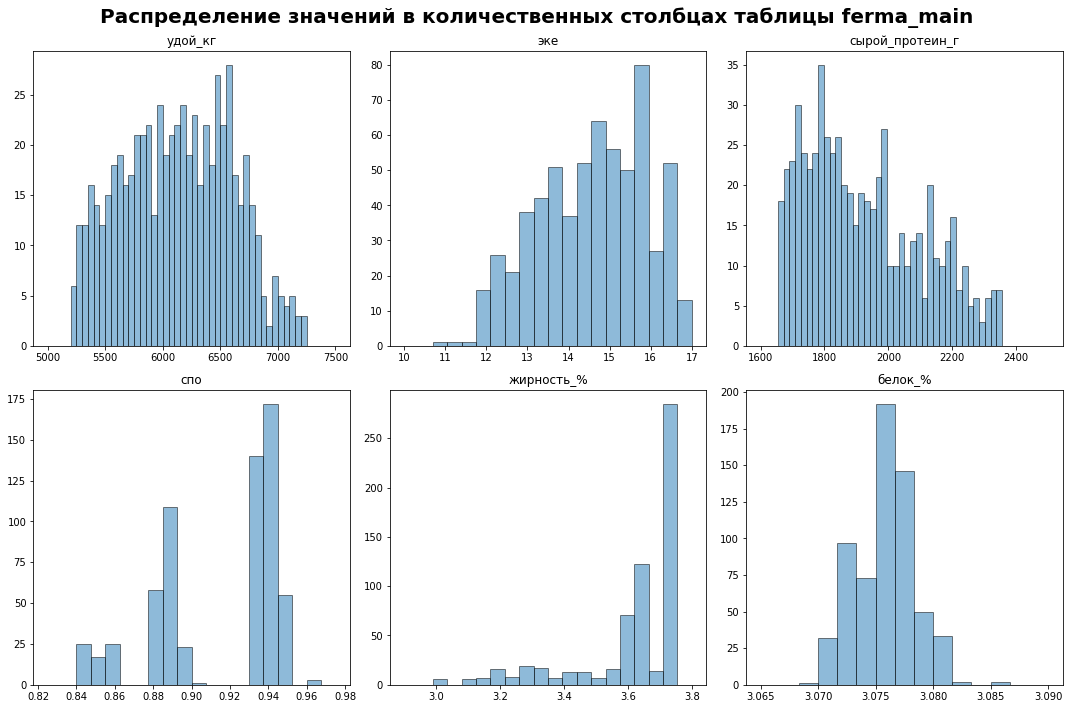

In [46]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize = (15,10))
fig.suptitle(f'Распределение значений в количественных столбцах таблицы ferma_main', fontsize = 20, fontweight='bold')

ferma_main.plot(kind='hist', y="удой_кг", legend=False, title="удой_кг", ec='black', alpha=0.5, \
                range=(5000, 7500), bins=50, ax=ax[0, 0]).set(ylabel='')
ferma_main.plot(kind='hist', y="эке", legend=False, title="эке", ec='black', alpha=0.5, \
                range=(10, 17), bins=20, ax=ax[0, 1]).set(ylabel='')
ferma_main.plot(kind='hist', y="сырой_протеин_г", legend=False, title="сырой_протеин_г", ec='black', alpha=0.5, \
                range=(1600, 2500), bins=50, ax=ax[0, 2]).set(ylabel='')
ferma_main.plot(kind='hist', y="спо", legend=False, title="спо", ec='black', alpha=0.5, \
                range=(0.825, 0.975), bins=20, ax=ax[1, 0]).set(ylabel='')
ferma_main.plot(kind='hist', y="жирность_%", legend=False, title="жирность_%", ec='black', alpha=0.5, \
                range=(2.9, 3.8), bins=20, ax=ax[1, 1]).set(ylabel='')
ferma_main.plot(kind='hist', y="белок_%", legend=False, title="белок_%", ec='black', alpha=0.5, \
                range=(3.065, 3.09), bins=15, ax=ax[1, 2]).set(ylabel='')


plt.tight_layout()
plt.show()

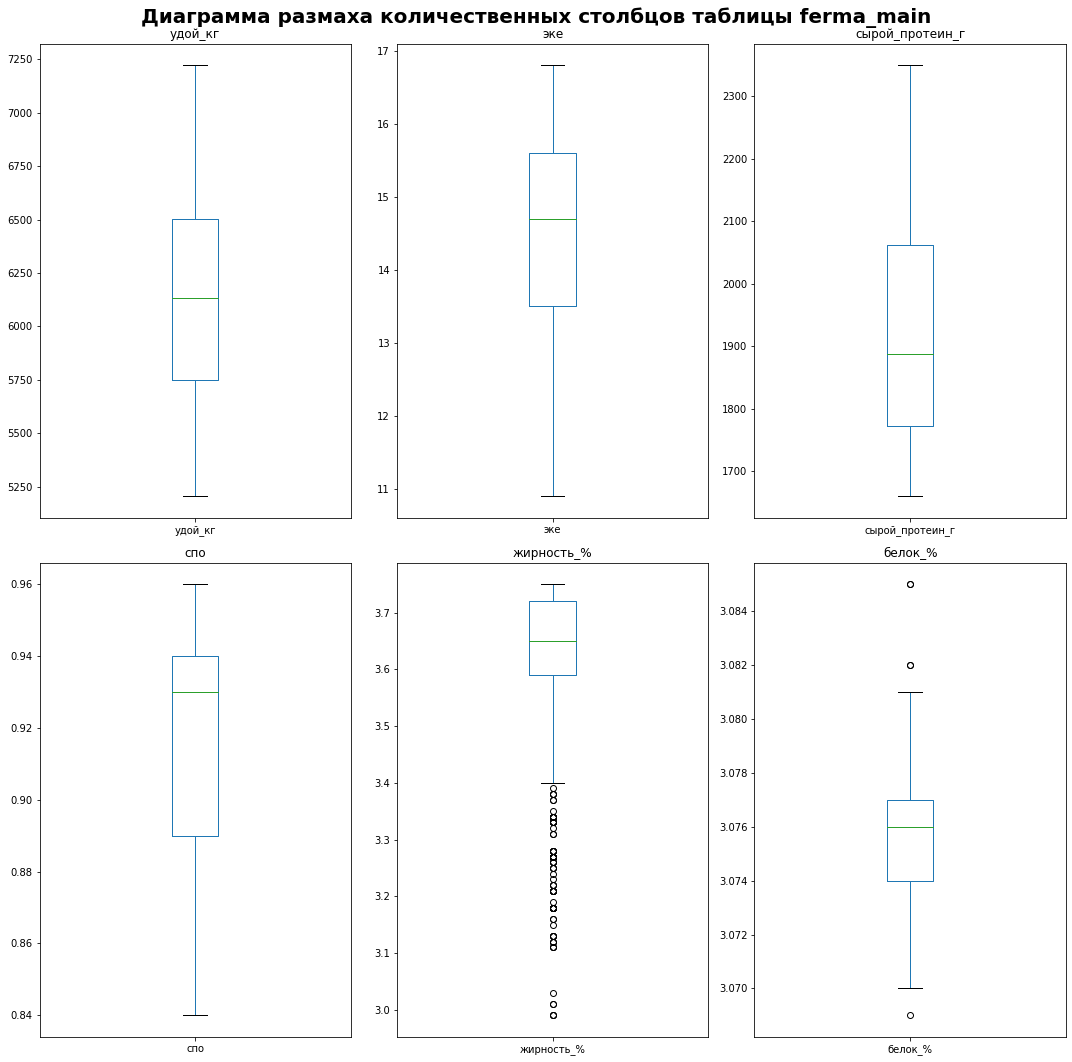

In [47]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize = (15,15))
fig.suptitle(f'Диаграмма размаха количественных столбцов таблицы ferma_main', fontsize = 20, fontweight='bold')

ferma_main.plot(kind='box', y="удой_кг", legend=False, title="удой_кг", ax=ax[0, 0])
ferma_main.plot(kind='box', y="эке", legend=False, title="эке", ax=ax[0, 1])
ferma_main.plot(kind='box', y="сырой_протеин_г", legend=False, title="сырой_протеин_г", ax=ax[0, 2])
ferma_main.plot(kind='box', y="спо", legend=False, title="спо", ax=ax[1, 0])
ferma_main.plot(kind='box', y="жирность_%", legend=False, title="жирность_%", ax=ax[1, 1])
ferma_main.plot(kind='box', y="белок_%", legend=False, title="белок_%", ax=ax[1, 2])


plt.tight_layout()
plt.show()

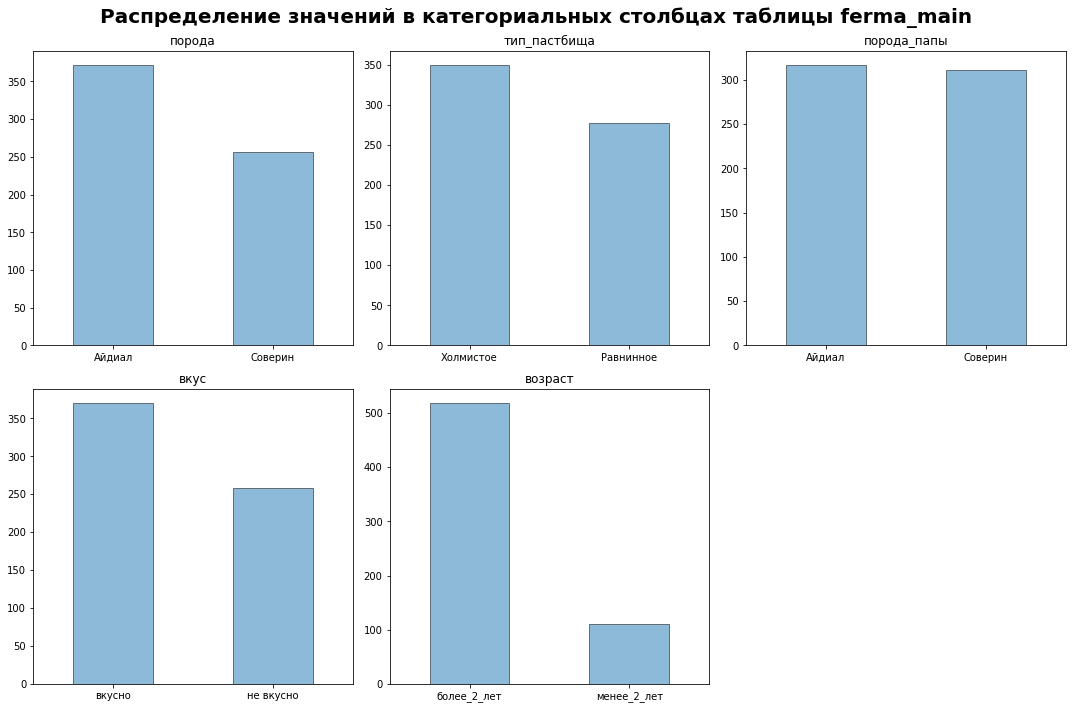

In [48]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize = (15,10))
fig.suptitle(f'Распределение значений в категориальных столбцах таблицы ferma_main', fontsize = 20, fontweight='bold')
ferma_main['порода'].value_counts(ascending=False).plot(kind='bar', y="порода", legend=False, title="порода",
               rot=0, ec='black', alpha=0.5, ax=ax[0, 0]).set(ylabel='')
ferma_main['тип_пастбища'].value_counts(ascending=False).plot(kind='bar', y="тип_пастбища", legend=False, title="тип_пастбища", ec='black', alpha=0.5, \
                rot=0, ax=ax[0, 1]).set(ylabel='')
ferma_main['порода_папы'].value_counts(ascending=False).plot(kind='bar', y="порода_папы", legend=False, title="порода_папы", ec='black', alpha=0.5, \
               rot=0, ax=ax[0, 2]).set(ylabel='')
ferma_main['вкус'].value_counts(ascending=False).plot(kind='bar', y="вкус", legend=False, title="вкус", ec='black', alpha=0.5, \
                 rot=0, ax=ax[1, 0]).set(ylabel='')
ferma_main['возраст'].value_counts(ascending=False).plot(kind='bar', y="возраст", legend=False, title="возраст", ec='black', alpha=0.5, \
               rot=0, ax=ax[1, 1]).set(ylabel='')

ax[1,2].set_axis_off()
plt.tight_layout()
plt.show()

**Вывод:** Большая часть коров старше 2 лет,у многих коров молоко не вкусное (у 250 из примерно 600)

### Статистический анализ таблицы `ferma_dad`

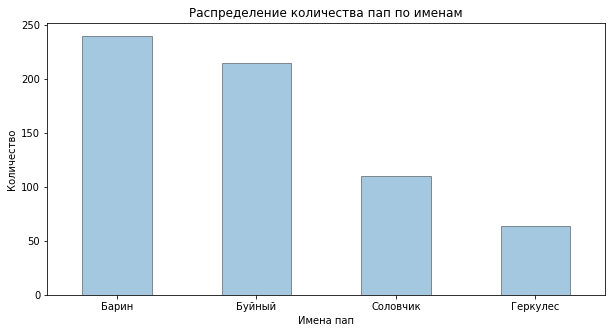

In [49]:
ax = ferma_dad['имя_папы'].value_counts(ascending=False).plot.bar(rot=0, ec='black', alpha=0.4, figsize=(10, 5))
plt.title('Распределение количества пап по именам')
plt.xlabel('Имена пап')
plt.ylabel('Количество')

plt.show()

### Статистический анализ таблицы `cow_buy`

In [50]:
cow_buy_num_columns = ['текущая_жирность_%', 'текущий_белок_%']
cow_buy[cow_buy_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
текущая_жирность_%,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
текущий_белок_%,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


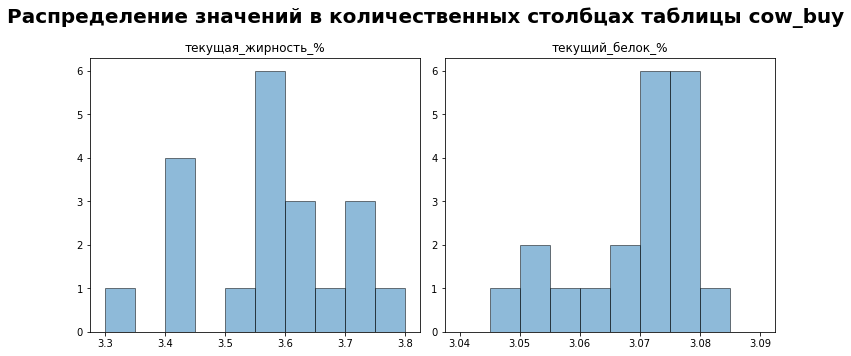

In [51]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (10,5))
fig.suptitle(f'Распределение значений в количественных столбцах таблицы cow_buy', fontsize = 20, fontweight='bold')

cow_buy.plot(kind='hist', y="текущая_жирность_%", legend=False, title="текущая_жирность_%", ec='black', alpha=0.5, \
                range=(3.3, 3.8), bins=10, ax=ax0).set(ylabel='')
cow_buy.plot(kind='hist', y="текущий_белок_%", legend=False, title="текущий_белок_%", ec='black', alpha=0.5, \
                range=(3.04, 3.09), bins=10, ax=ax1).set(ylabel='')

plt.tight_layout()
plt.show()

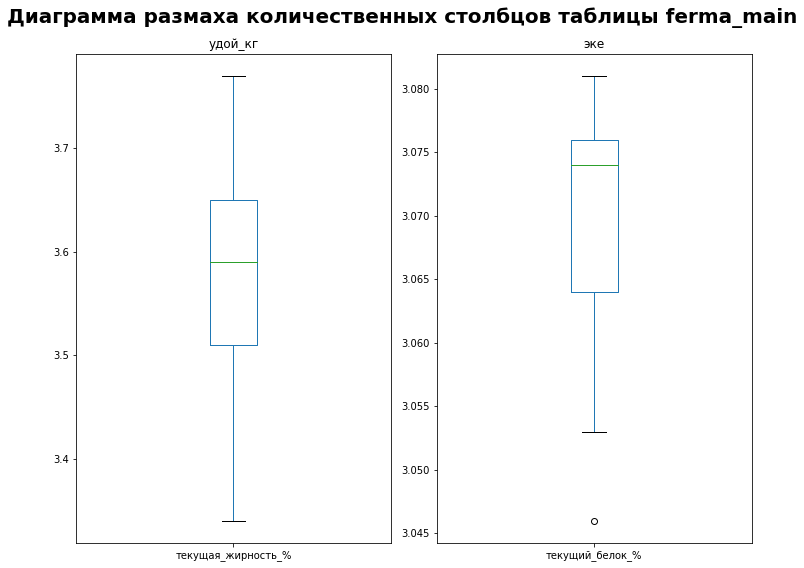

In [52]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (10,8))
fig.suptitle(f'Диаграмма размаха количественных столбцов таблицы ferma_main', fontsize = 20, fontweight='bold')

cow_buy.plot(kind='box', y="текущая_жирность_%", legend=False, title="удой_кг", ax=ax0)
cow_buy.plot(kind='box', y="текущий_белок_%", legend=False, title="эке", ax=ax1)

plt.tight_layout()
plt.show()

In [53]:
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


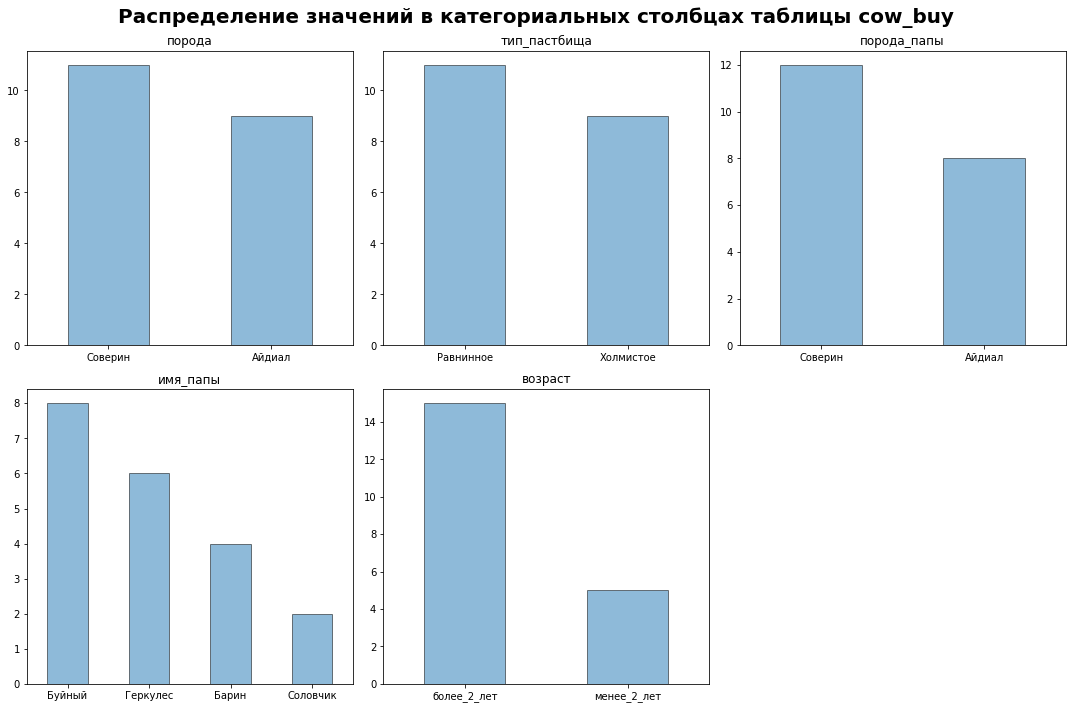

In [54]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize = (15,10))
fig.suptitle(f'Распределение значений в категориальных столбцах таблицы cow_buy', fontsize = 20, fontweight='bold')
cow_buy['порода'].value_counts(ascending=False).plot(kind='bar', y="порода", legend=False, title="порода",
               rot=0, ec='black', alpha=0.5, ax=ax[0, 0]).set(ylabel='')
cow_buy['тип_пастбища'].value_counts(ascending=False).plot(kind='bar', y="тип_пастбища", legend=False, title="тип_пастбища", ec='black', alpha=0.5, \
                rot=0, ax=ax[0, 1]).set(ylabel='')
cow_buy['порода_папы'].value_counts(ascending=False).plot(kind='bar', y="порода_папы", legend=False, title="порода_папы", ec='black', alpha=0.5, \
               rot=0, ax=ax[0, 2]).set(ylabel='')
cow_buy['имя_папы'].value_counts(ascending=False).plot(kind='bar', y="имя_папы", legend=False, title="имя_папы", ec='black', alpha=0.5, \
                 rot=0, ax=ax[1, 0]).set(ylabel='')
cow_buy['возраст'].value_counts(ascending=False).plot(kind='bar', y="возраст", legend=False, title="возраст", ec='black', alpha=0.5, \
               rot=0, ax=ax[1, 1]).set(ylabel='')

ax[1,2].set_axis_off()
plt.tight_layout()
plt.show()

**Вывод:** Выбросов нет. Данные во многом похожи на df ferma_main

## Корреляционный анализ

### Расчет коэффициентов корреляции

In [55]:
# коэфф-т корреляции между количественными признаки методом Пирсона
ferma_main.corr()

,id,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
удой_кг,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
эке,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
сырой_протеин_г,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
спо,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
жирность_%,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
белок_%,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


In [56]:
# коэфф-т корреляции между количественными признаки методом Спирмана
ferma_main.corr(method='spearman')

,id,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
id,1.000000,-0.003097,-0.022382,-0.037108,-0.021642,0.038631,0.003743
удой_кг,-0.003097,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке,-0.022382,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
сырой_протеин_г,-0.037108,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо,-0.021642,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
жирность_%,0.038631,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
белок_%,0.003743,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


In [1]:
#import phik
!pip install phik -q

<AxesSubplot:>

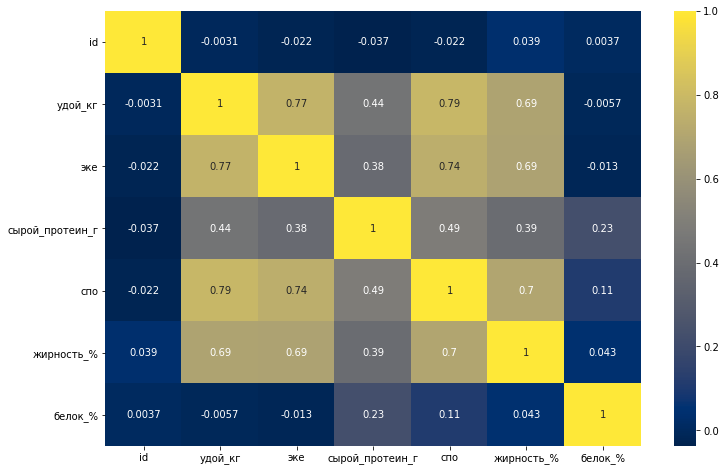

In [58]:
plt.subplots(figsize=(12, 8))
sns.heatmap(ferma_main.corr(method='spearman'), annot=True, cmap='cividis') 

### Корреляция для признака удой_кг с учётом типа пастбища

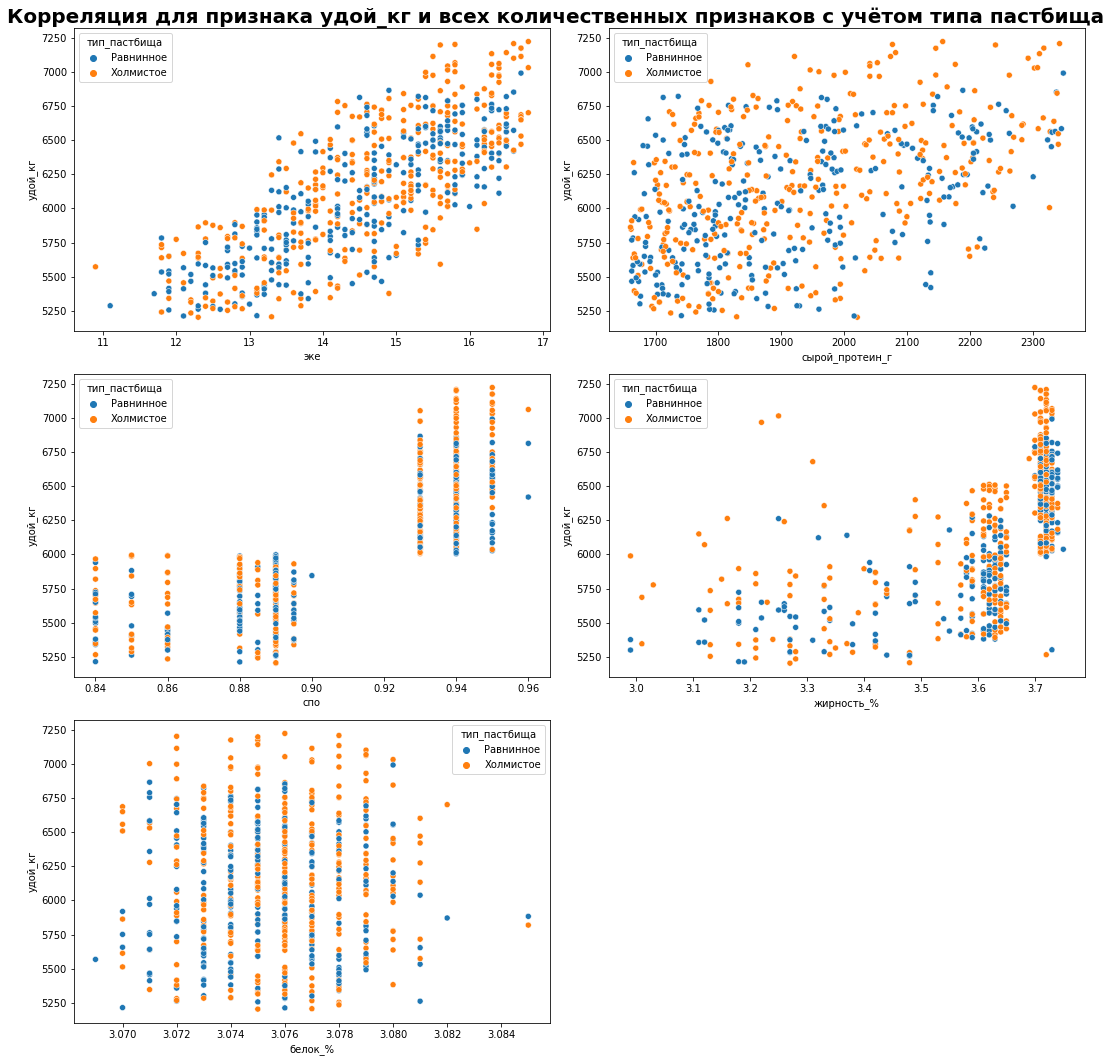

None


In [59]:
def corr_matrix(name, column):
    fig, ax = plt.subplots(nrows=3,ncols=2, figsize = (15,15))
    fig.suptitle(f'{name}', \
             fontsize = 20, fontweight='bold')
    sns.scatterplot(data=ferma_main, x='эке', y='удой_кг', hue=column, ax=ax[0, 0])
    sns.scatterplot(data=ferma_main, x='сырой_протеин_г', y='удой_кг', hue=column, ax=ax[0, 1])
    sns.scatterplot(data=ferma_main, x='спо', y='удой_кг', hue=column, ax=ax[1, 0])
    sns.scatterplot(data=ferma_main, x='жирность_%', y='удой_кг', hue=column, ax=ax[1, 1])
    sns.scatterplot(data=ferma_main, x='белок_%', y='удой_кг', hue=column, ax=ax[2, 0])

    ax[2,1].set_axis_off()
    plt.tight_layout()
    plt.show()
    
print(corr_matrix('Корреляция для признака удой_кг и всех количественных признаков с учётом типа пастбища', 'тип_пастбища'))

### Корреляция для признака удой_кг с учётом породы

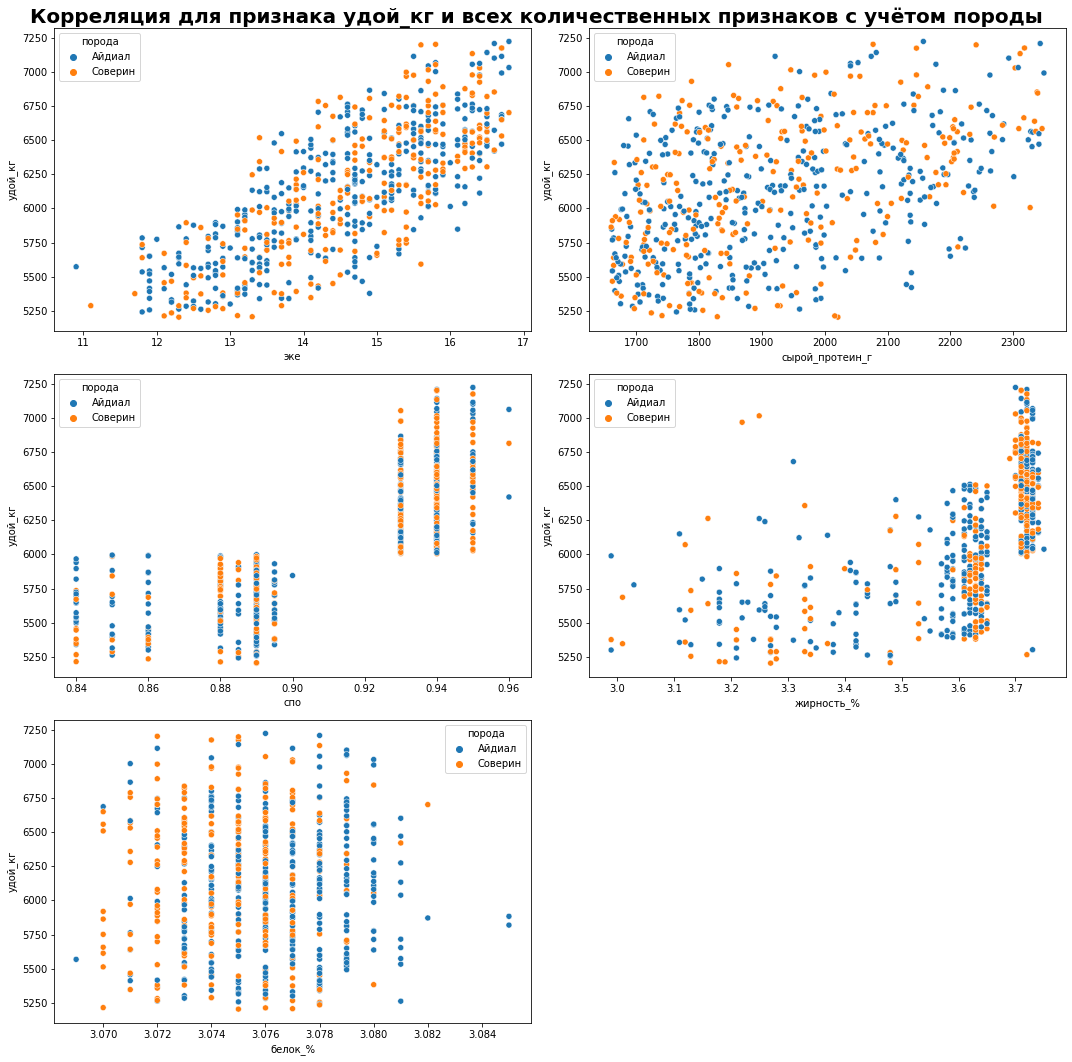

None


In [60]:

print(corr_matrix('Корреляция для признака удой_кг и всех количественных признаков с учётом породы', 'порода'))

### Корреляция для признака удой_кг с учётом породы папы

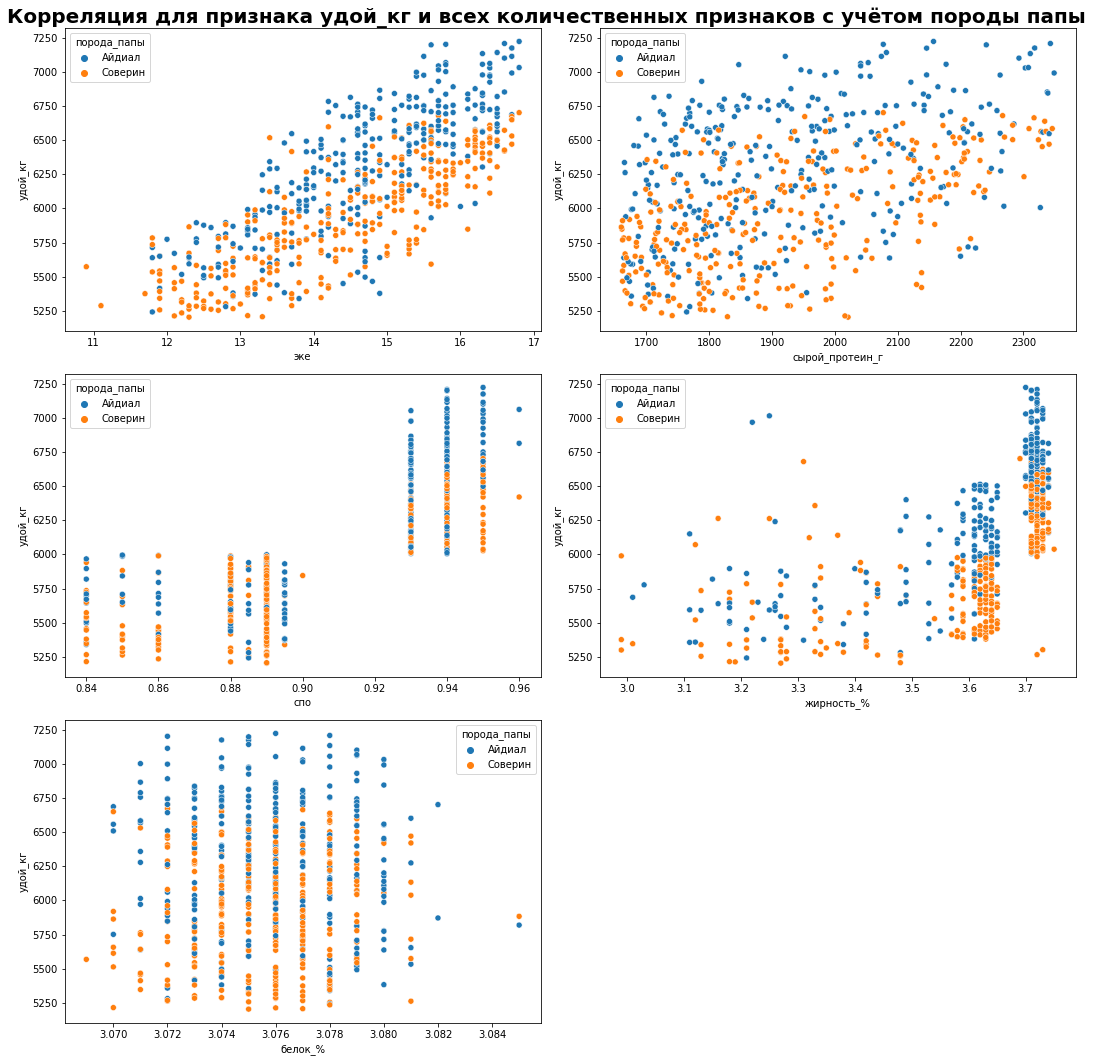

None


In [61]:
print(corr_matrix('Корреляция для признака удой_кг и всех количественных признаков с учётом породы папы', 'порода_папы'))


### Корреляция для признака удой_кг с учётом имени папы

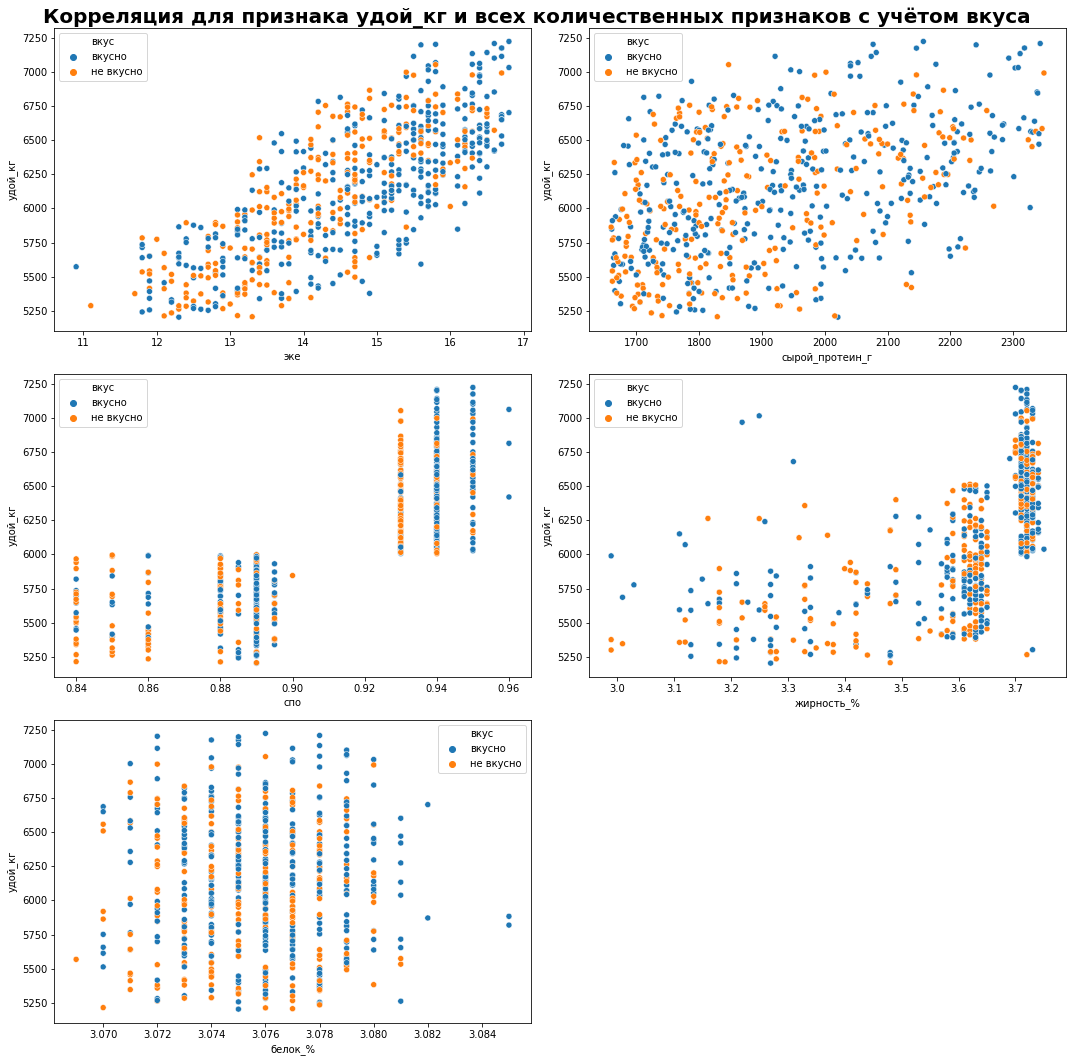

None


In [62]:
print(corr_matrix('Корреляция для признака удой_кг и всех количественных признаков с учётом вкуса', 'вкус'))


### Корреляция для признака удой_кг с учётом возраста

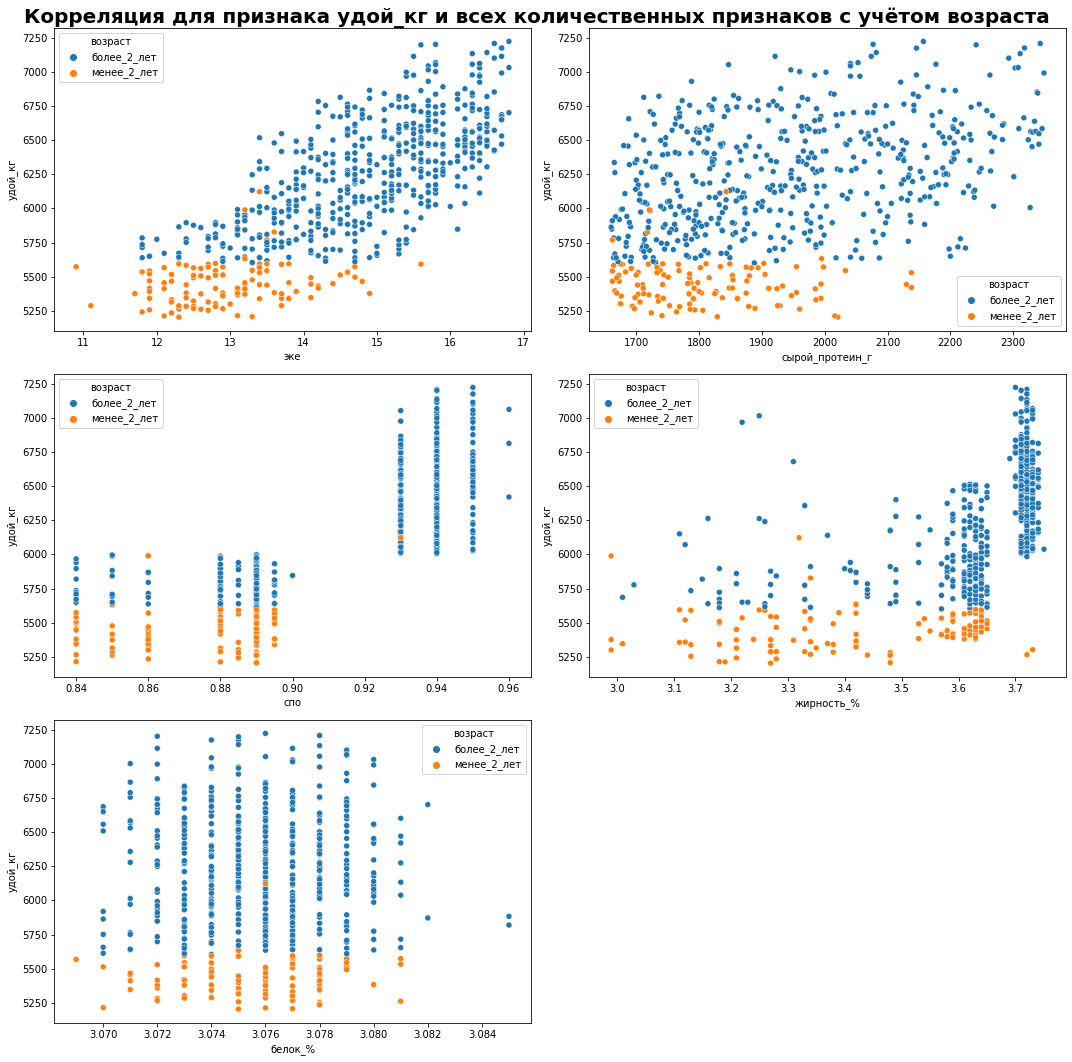

None


In [63]:
print(corr_matrix('Корреляция для признака удой_кг и всех количественных признаков с учётом возраста', 'возраст'))


### Матрица диаграмм рассеяния по всем количественным признакам таблицы ferma_main

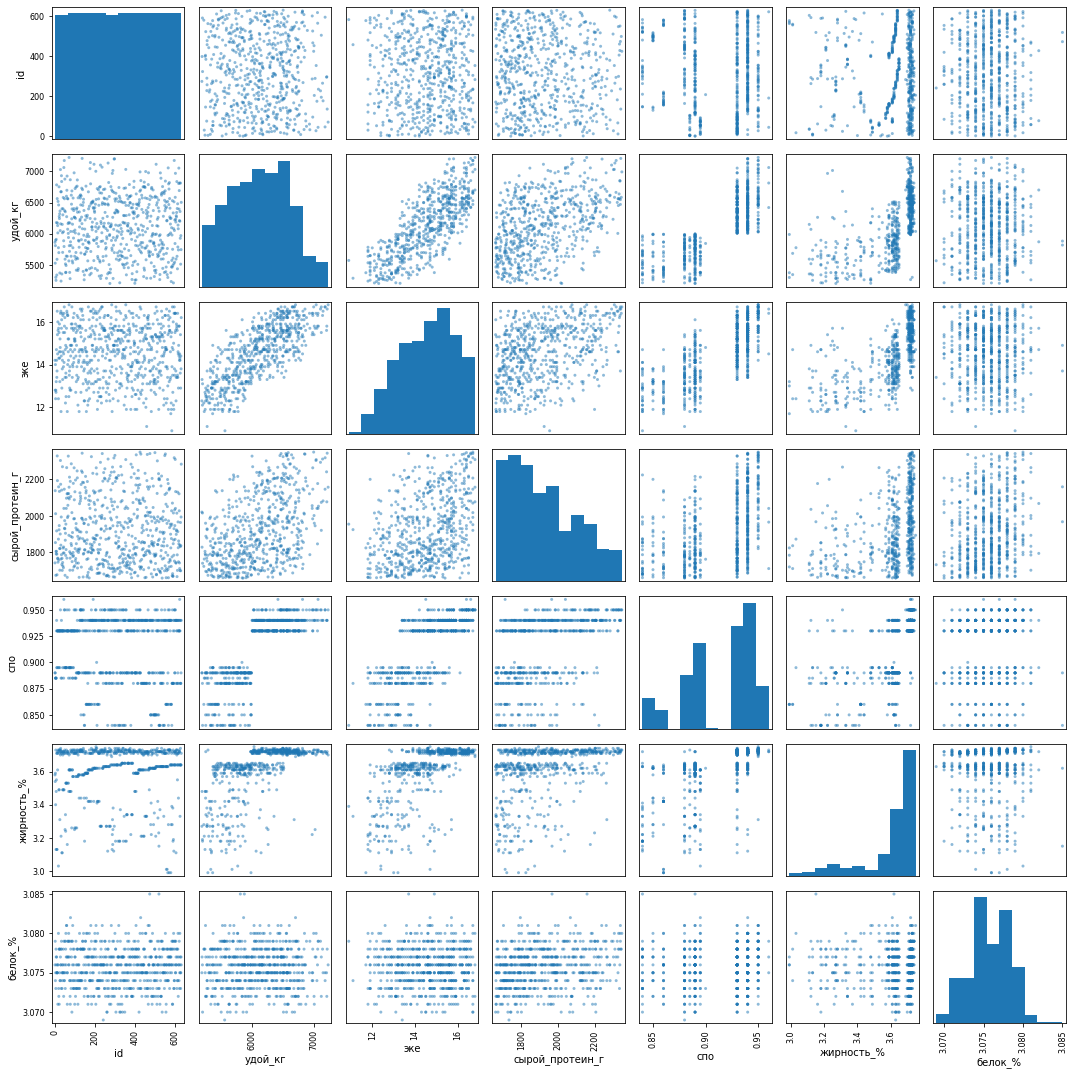

In [64]:
pd.plotting.scatter_matrix(ferma_main, figsize=(15, 15))
plt.tight_layout()
plt.show()

**Вывод:** Наибольшую корреляцию между целевым признаком удой имеют эке и спо (0.77 и 0.81 соответственно) и возрастом (с возрастом удой возрастает). Все остальные количественные признаки (кроме белка) так же имеют положительную корреляцию с целевым признаком. 
Так же между собой коррелируют признаки:
- спо и эке (0.75)
- жирность и эке (0.64)
- жирность и спо (0.63)
- сырой протеин и спо (0.45)

и другие признаки.

Нелинейная связь наблюдается между целевым признаком и входными признаками: эке, спо, жирность, белок

Линейная связь наблюдается между целевым признаком и входными признаками: сырой протеин

Умеренная корреляция наблюдается между целевым признаком и взодными признаками: сырой протеин, порода папы

Слабая корреляция наблюдается между целевым признаком и входными признаками: жирность, белок, порода, тип пастбища.

Можно сделать вывод, что состав молока не оказывает прямого влияния на удой.

Мультиколлинеарность между входными признаками не наблюдается. 

## Обучение модели линейной регрессии

### Подготовка данных датасета ferma_main.csv и обучение на них 1-й модели LinearRegression

Разделим данные на тренировочные и тестовые. В качестве целевого признака будем использовать `удой_кг`.
В качестве входных признаков будем использовать:
- `эке` - имет корреляцию с целевым признаком + ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы, что напрямую может оказывать влияние на удой
- `сырой_протеин_г` - имет корреляцию с целевым признаком + содержание сырого протеина в корме (в граммах), что так же влияет на питание, что в свою очередь может влиять на удой
- `спо` - Сахаро-протеиновое соотношение — отношение сахара к протеину в корме коровы, влияет по аналогии с предыдущими признаками
- `порода`
- `тип_пастбища`
- `порода_папы`
- `возраст`

In [65]:
ferma_main

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус,возраст
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,Соверин,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,Соверин,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,Соверин,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,Соверин,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


In [66]:
# выделим в отдельные переменные целевой признак и входные признаки

X = ferma_main[['эке', 'сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы', 'возраст']]
y = ferma_main['удой_кг']

# разделите данные на тренировочные и тестовые, зафиксируем random_state
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 7)
(157, 7)
(471,)
(157,)


In [67]:
# выделим списоки количественных и качественных признаков 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']
num_col_names = ['эке', 'сырой_протеин_г', 'спо']

In [68]:
# подготовка количественных признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


In [69]:
# подготовка качественных признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [70]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [71]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [72]:
# выведите пять первых строк из тренировочного датафрейма командой print()
X_train.head()

,x0_Соверин,x1_Холмистое,x2_Соверин,x3_менее_2_лет,эке,сырой_протеин_г,спо
0,1.0,1.0,1.0,0.0,1.502378,1.079523,0.837130
1,1.0,1.0,1.0,1.0,-1.557270,-0.196920,-0.703660
2,0.0,0.0,0.0,0.0,0.125537,-1.386085,-1.011818
3,0.0,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0.0,0.0,0.0,0.0,-1.098323,0.828598,-0.703660


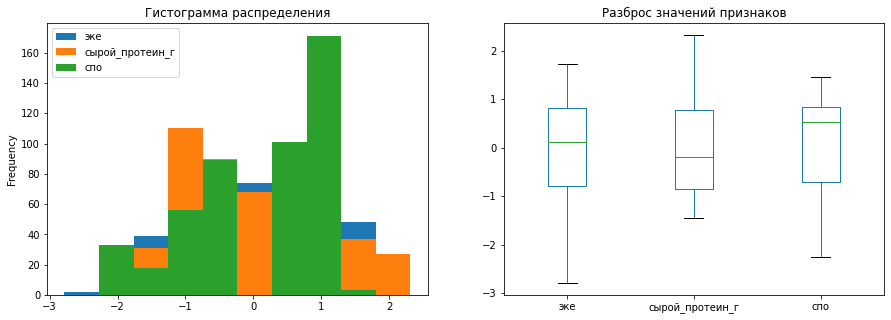

In [73]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=0)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [74]:
# обучим модель на тренировочных данных
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train, y_train)

# получим предсказания модели на тестовых данных и сохраните результат в переменную predictions
predictions_1 = model_lr_1.predict(X_test)

# посчитаем значение R2 для линейной регрессии
r2_1 = r2_score(y_test, predictions_1)  
print(f'R2 LinearRegression = {r2_1:.5f}')

R2 LinearRegression = 0.78441


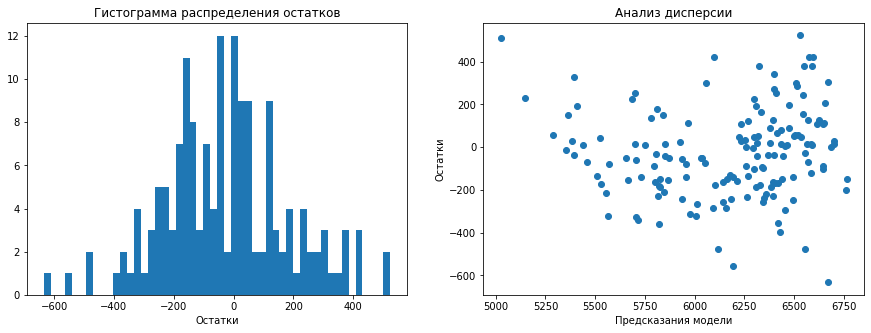

In [75]:
# проведите анализ остатков

residuals_1 = y_test - predictions_1

# построим графики по количественным признакам — гистограмму распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals_1, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residuals_1, x=predictions_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:** Модель обучена. В 78 процентах случаев предсказание модели ближе к истине, чем среднее значение целевого признака.
Остатки имеют нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения.
Дисперсия показывает, что модель чаще или сильнее ошибается, предсказывая удой сильно выше или сильно ниже среднего. Это говорит о неточности модели. Данную ситуацию можно исправить либо, добавив больше признаков, либо, изменив взаимосвязь входных признаков с целевым.

### Подготовка данных датасета ferma_main.csv с учётом связи входных признаков с целевым и обучение на них 2-й модели LinearRegression

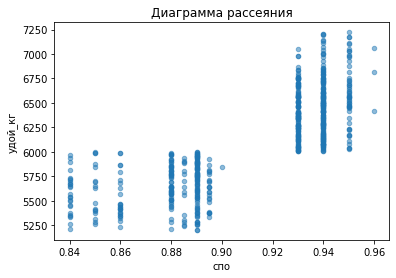

In [76]:
ferma_main.plot(x='спо', y='удой_кг', kind='scatter', alpha=0.5, title='Диаграмма рассеяния')
plt.show()

 СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

Видно, что при СПО > 0.91 коровы имеют удой от 6000 кг. А при СПО <= 0.91 удой меньше 6000 кг.

In [77]:
# сохраним первоначальный df в новую переменную для обучения второй модели
ferma_2 = ferma_main.copy()

In [78]:
ferma_2['спо'] = ferma_2['спо'].apply(lambda x: 'меньше_0.9' if x < 0.9 else 'больше_0.9')

ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

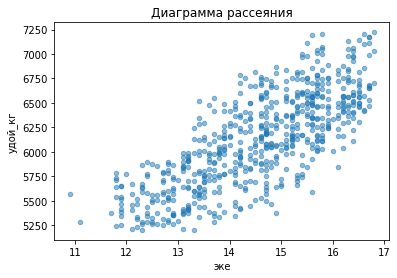

In [79]:
ferma_2.plot(x='эке', y='удой_кг', kind='scatter', alpha=0.5, title='Диаграмма рассеяния')
plt.show()

In [80]:
print(f'К-т корреляции = {ferma_2["эке"].corr(ferma_2["удой_кг"])}')

К-т корреляции = 0.7650977877344268


In [81]:
ferma_2['эке_в_квадрате'] = ferma_2['эке'].apply(lambda x: x**2)

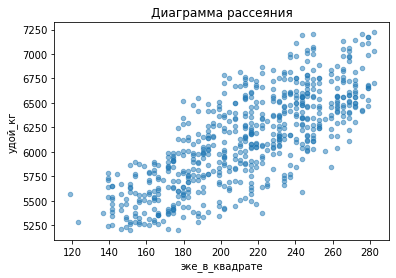

In [82]:
ferma_2.plot(x='эке_в_квадрате', y='удой_кг', kind='scatter', alpha=0.5, title='Диаграмма рассеяния')
plt.show()

In [83]:
print(f'К-т корреляции = {ferma_2["эке_в_квадрате"].corr(ferma_2["удой_кг"])}')

К-т корреляции = 0.7655300782523312


Разделим данные на тренировочные и тестовые. В качестве целевого признака будем использовать удой_кг. В качестве входных признаков будем использовать:

- эке_в_квадрате
- сырой_протеин_г 
- спо 
- порода
- тип_пастбища
- порода_папы
- возраст

In [84]:
# выделим в отдельные переменные целевой признак и входные признаки

X = ferma_2[['сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы', 'возраст', 'эке_в_квадрате']]
y = ferma_2['удой_кг']

# разделите данные на тренировочные и тестовые, зафиксируем random_state
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 7)
(157, 7)
(471,)
(157,)


In [85]:
# выделим списоки количественных и качественных признаков 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

In [86]:
# подготовка количественных признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


In [87]:
# подготовка качественных признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [88]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [89]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [90]:
# выведите пять первых строк из тренировочного датафрейма командой print()
X_train.head()

,x0_Соверин,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_меньше_0.9,эке_в_квадрате,сырой_протеин_г
0,1.0,1.0,1.0,0.0,0.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,1.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,1.0,-1.102358,0.828598


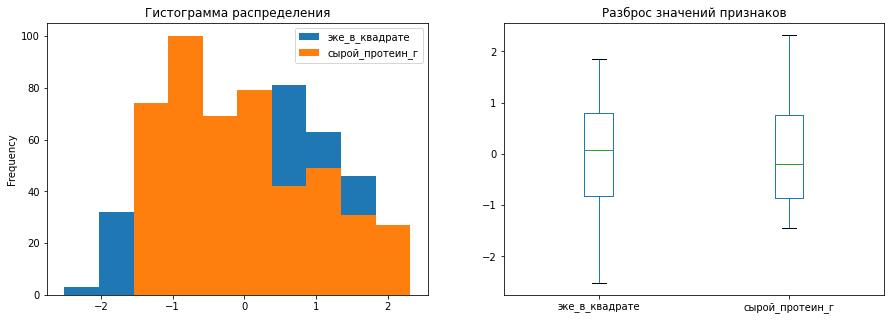

In [91]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=0)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [92]:
# обучим модель на тренировочных данных
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)

# получим предсказания модели на тестовых данных и сохраните результат в переменную predictions
predictions_2 = model_lr_2.predict(X_test)

# посчитаем значение R2 для линейной регрессии
r2_2 = r2_score(y_test, predictions_2)  
print(f'R2 LinearRegression = {r2_2:.5f}')

R2 LinearRegression = 0.81777


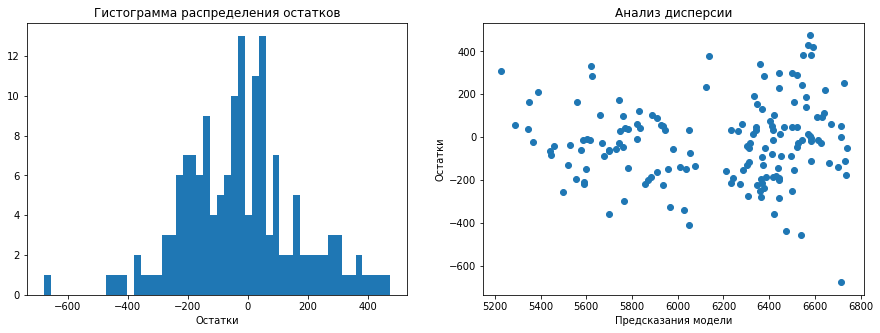

In [93]:
# проведите анализ остатков

residuals_2 = y_test - predictions_2

# построим графики по количественным признакам — гистограмму распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals_2, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residuals_2, x=predictions_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:** Данная модель справилась с прогнозом лучше первой, она не ошибается в 81,7 % случаях. 
Остатки имеют нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения. При этом данное смещение меньше, чем у предыдущей модели.
При анализе дисперсии ошибок при различных прогнозах можно заметить, что она стала более стабильной по сравнению с предыдущей моделью.
Опираясь на приведенный результат, можно сказать, что вторая модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым повлияло на модель в лучшую сторону.

### Добавление нового признака в датасет ferma_main.csv и обучение на них 3-й модели LinearRegression

In [94]:
ferma_3 = ferma_2.merge(ferma_dad, on='id', how='left')
ferma_3.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус,возраст,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,меньше_0.9,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,меньше_0.9,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,меньше_0.9,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,меньше_0.9,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,меньше_0.9,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


In [95]:
print(ferma_main.shape, ferma_3.shape)


(628, 12) (628, 14)


Разделим данные на тренировочные и тестовые. В качестве целевого признака будем использовать удой_кг. В качестве входных признаков будем использовать:

- `эке_в_квадрате`
- `сырой_протеин_г`
- `спо` 
- `порода`
- `тип_пастбища`
- `порода_папы`
- `возраст`
- `имя_папы`


In [96]:
ferma_3.columns

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы', 'жирность_%', 'белок_%', 'вкус',
       'возраст', 'эке_в_квадрате', 'имя_папы'],
      dtype='object')

In [97]:
# выделим в отдельные переменные целевой признак и входные признаки

X = ferma_3[['сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы', 'возраст', 'эке_в_квадрате', 'имя_папы']]
y = ferma_3['удой_кг']

# разделите данные на тренировочные и тестовые, зафиксируем random_state
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 8)
(157, 8)
(471,)
(157,)


In [98]:
# выделим списоки количественных и качественных признаков 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

In [99]:
# подготовка количественных признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


In [100]:
# подготовка качественных признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [101]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [102]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [103]:
# выведите пять первых строк из тренировочного датафрейма командой print()
X_train.head()

,x0_Соверин,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_меньше_0.9,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_в_квадрате,сырой_протеин_г
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.102358,0.828598


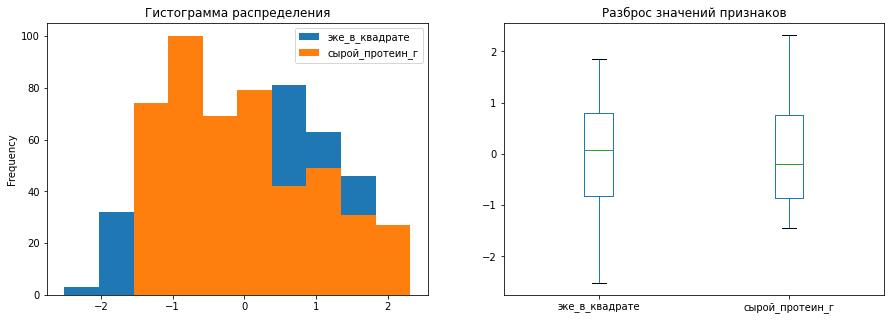

In [104]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=0)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [105]:
# обучим модель на тренировочных данных
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)

# получим предсказания модели на тестовых данных и сохраните результат в переменную predictions
predictions_3 = model_lr_3.predict(X_test)

# посчитаем значение R2 для линейной регрессии
r2_3 = r2_score(y_test, predictions_3)  
print(f'R2 LinearRegression = {r2_3:.5f}')

R2 LinearRegression = 0.82452


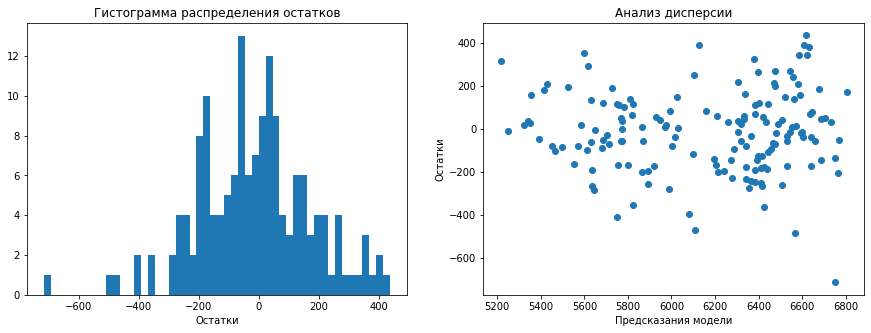

In [106]:
# проведите анализ остатков

residuals_3 = y_test - predictions_3

# построим графики по количественным признакам — гистограмму распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals_3, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residuals_3, x=predictions_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:** Третья модель правильно предсказывает в 82.45% случаях. Что лучше, чем у первой и второй моделей. 
Остатки имеют нормальное распределение. 
При анализе дисперсии ошибок при различных прогнозах можно заметить, что она более стабильна по сравнению с первой моделью и второй.
Можно сказать, что третья модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым, а также добавление в расчет ещэ одного входного признака повлияло на модель в лучшую сторону.

### Оценка качества каждой модели

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE. 

#### модель 1

In [107]:
# получение значений по трём метрикам: MSE, MAE, RMSE.
mse_1 = mean_squared_error(y_test, predictions_1)
print(f'Среднеквадратичная ошибка (MSE) 1-й модели ={mse_1:.2f}')

rmse_1 = mean_squared_error(y_test, predictions_1, squared=False) 
print(f'Корень среднеквадратичной ошибки  (MSE) 1-й модели ={rmse_1:.2f}')

mae_1 = mean_absolute_error(y_test, predictions_1)
print(f'Средняя абсолютная ошибка (MAE) 1-й модели ={mae_1:.2f}')

Среднеквадратичная ошибка (MSE) 1-й модели =43887.02
Корень среднеквадратичной ошибки  (MSE) 1-й модели =209.49
Средняя абсолютная ошибка (MAE) 1-й модели =164.24


#### модель 2

In [108]:
# получение значений по трём метрикам: MSE, MAE, RMSE.
mse_2 = mean_squared_error(y_test, predictions_2)
print(f'Среднеквадратичная ошибка (MSE) 2-ой модели ={mse_2:.2f}')

rmse_2 = mean_squared_error(y_test, predictions_2, squared=False) 
print(f'Корень среднеквадратичной ошибки  (MSE) 2-ой модели ={rmse_2:.2f}')

mae_2 = mean_absolute_error(y_test, predictions_2)
print(f'Средняя абсолютная ошибка (MAE) 2-ой модели ={mae_2:.2f}')

Среднеквадратичная ошибка (MSE) 2-ой модели =37095.72
Корень среднеквадратичной ошибки  (MSE) 2-ой модели =192.60
Средняя абсолютная ошибка (MAE) 2-ой модели =149.15


#### модель 3

In [109]:
# получение значений по трём метрикам: MSE, MAE, RMSE.
mse_3 = mean_squared_error(y_test, predictions_3)
print(f'Среднеквадратичная ошибка (MSE) 3-й модели ={mse_3:.2f}')

rmse_3 = mean_squared_error(y_test, predictions_3, squared=False) 
print(f'Корень среднеквадратичной ошибки  (MSE) 3-й модели ={rmse_3:.2f}')

mae_3 = mean_absolute_error(y_test, predictions_3)
print(f'Средняя абсолютная ошибка (MAE) 3-й модели ={mae_3:.2f}')

Среднеквадратичная ошибка (MSE) 3-й модели =35721.65
Корень среднеквадратичной ошибки  (MSE) 3-й модели =189.00
Средняя абсолютная ошибка (MAE) 3-й модели =146.27


Определим доверительный интервал прогноза лучшей модели.

In [110]:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6091.59984407294, 6220.6465385544)


Дополнительно посчитаем доверительный интервал остатков модели

In [111]:
quantiles=(0.025, 0.975)

lower_quantile = np.quantile(residuals_3, quantiles[0])
upper_quantile = np.quantile(residuals_3, quantiles[1])

print(f"Доверительный интервал остатков модели: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал остатков модели: [-395.5140686227448, 358.36111598984394]


**Вывод:** Третья модель имеет наименьшие показатели ошибок из всех трех вариантов. 

### С помощью лучшей модели прогнозируем удой коров, которых фермер хочет купить (в датасете cow_buy.csv)

Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение). Возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%, так как технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [112]:
cow_buy['эке'] = ferma_main['эке'].mean() * 1.05
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean() * 1.05
cow_buy['спо'] = ferma_main['спо'].mean() * 1.05

In [113]:
cow_buy.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,эке,сырой_протеин_г,спо
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [114]:
cow_buy_new = cow_buy.copy()

In [115]:
cow_buy_new['спо'] = cow_buy_new['спо'].apply(lambda x: 'меньше_0.9' if x < 0.9 else 'больше_0.9')
cow_buy_new['эке_в_квадрате'] = cow_buy_new['эке'].apply(lambda x: x**2)
cow_buy_new

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,эке,сырой_протеин_г,спо,эке_в_квадрате
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,больше_0.9,233.361138
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,больше_0.9,233.361138
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,больше_0.9,233.361138


Подготовим данные датафрейма cow_buy (масштабируем и кодируем)

In [116]:
# выделим списоки количественных и качественных признаков 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

In [117]:
# подготовка количественных признаков (масштабирование)
cow_buy_scaled = scaler.transform(cow_buy_new[num_col_names])

In [118]:
# подготовка качественных признаков (кодирование)
cow_buy_ohe = encoder.transform(cow_buy_new[cat_col_names])

encoder_col_names = encoder.get_feature_names()

In [119]:
# создаём датафреймы из закодированных и отмасштабированных данных
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

In [120]:
# объединяем все преобразованные данные 
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
cow_buy_final = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

In [121]:
# выведим пять первых строк из тренировочного датафрейма командой print()
cow_buy_final.head()

,x0_Соверин,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_меньше_0.9,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_в_квадрате,сырой_протеин_г
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.542248,0.517384
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.542248,0.517384
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.542248,0.517384
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.542248,0.517384
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.542248,0.517384


In [122]:
cow_buy['удой_кг'] = model_lr_3.predict(cow_buy_final)
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,эке,сырой_протеин_г,спо,удой_кг
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6610.852270
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6377.881767
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6280.381102
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6594.844393
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6542.020197
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,6427.137029
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6610.852270
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,6568.509409
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6280.381102
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,6404.216752


**Вывод:** наша лучшая модель предсказала, что все коровы дадут удой от 6000 кг в год. При этом помним, что модель склонна завышать положительный прогноз (доверительный интервал = 358.36)

## Обучение модели логистической регрессии

Возьмем уже подготовленный датафрейм ferma_2. Разделим данные на тренировочные и тестовые. В качестве целевого признака будем использовать `вкус`.
В качестве входных признаков будем использовать:
- `эке_в_квадрате` -ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы
- `сырой_протеин_г` - и содержание сырого протеина в корме (в граммах)
- `спо` - Сахаро-протеиновое соотношение — отношение сахара к протеину в корме коровы
- `порода`
- `тип_пастбища`
- `порода_папы`
- `возраст`
- `жирность_%`
- `белок_%`

In [123]:
ferma_3.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус,возраст,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,меньше_0.9,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,меньше_0.9,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,меньше_0.9,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,меньше_0.9,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,меньше_0.9,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


In [124]:
ferma_3.columns

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы', 'жирность_%', 'белок_%', 'вкус',
       'возраст', 'эке_в_квадрате', 'имя_папы'],
      dtype='object')

In [125]:
# выделим в отдельные переменные целевой признак и входные признаки

X = ferma_3[['сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы', 'жирность_%', 'белок_%', \
       'возраст', 'эке_в_квадрате', 'имя_папы']]
y = ferma_3['вкус']

# разделите данные на тренировочные и тестовые, зафиксируем random_state
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
y_train = y_train.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
y_test = y_test.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 10)
(157, 10)
(471,)
(157,)


In [126]:
# выделим списоки количественных и качественных признаков 
cat_col_names = ['спо', 'порода', 'тип_пастбища','возраст']
num_col_names = ['сырой_протеин_г', 'жирность_%', 'белок_%', 'эке_в_квадрате']

In [127]:
# подготовка количественных признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [128]:
# подготовка качественных признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

In [129]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [130]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [131]:
# выведите пять первых строк из тренировочного датафрейма командой print()
X_train.head()

,x0_меньше_0.9,x1_Соверин,x2_Холмистое,x3_менее_2_лет,сырой_протеин_г,жирность_%,белок_%,эке_в_квадрате
0,0.0,1.0,1.0,0.0,1.079523,0.562532,-0.679069,1.577968
1,1.0,1.0,1.0,1.0,-0.196920,-1.601817,-1.452568,-1.511438
2,1.0,0.0,0.0,0.0,-1.386085,-2.563750,1.254677,0.082269
3,0.0,0.0,1.0,0.0,0.752230,0.081565,1.254677,-0.150235
4,1.0,0.0,0.0,0.0,0.828598,0.201807,0.094429,-1.102358


In [132]:
# обучим модель на тренировочных данных
clf = LogisticRegression(random_state=RANDOM_STATE)

clf = clf.fit(X_train, y_train)

# получим предсказания модели на тестовых данных и сохраните результат в переменную 
y_pred = clf.predict(X_test)

print(clf.coef_) 

[[-0.72690316 -0.08686778 -0.52010587  0.2456151  -0.14203522  0.02804405
  -0.2703766  -0.61217829]]


In [133]:
# Проверим веса коэффициентов:
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}") 

x0_меньше_0.9       : +0.483404
x1_Соверин          : +0.916798
x2_Холмистое        : +0.594458
x3_менее_2_лет      : +1.278407
сырой_протеин_г     : +0.867591
жирность_%          : +1.028441
белок_%             : +0.763092
эке_в_квадрате      : +0.542169


In [134]:
# оцениваем accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6369426751592356


На данный момент модель ошибается в почти 36 % случаев

In [135]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.348
precision:  0.667


Text(0.5, 24.0, 'Predicted')

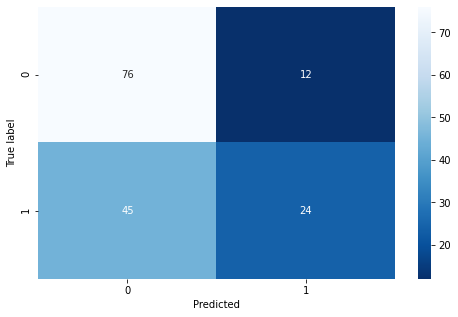

In [136]:
#построим матрицу ошибок
plt.subplots(figsize=(8, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.ylabel('True label')
plt.xlabel('Predicted')

Из матрицы ошибок видно, что:

- в 76 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (0 равно 0)
- в 45 случаях модель неправильно относла невкусное молоко к категории 'вкусно' (0 не равно 1)
- в 12 случаях модель неправильно относла вкусное молоко к категории ' не вкусно' (1 не равно 0)
- в 24 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно' (1 равно 1)

Главное для заказчика - вкусное молоко. То есть можно сказать, что для него важно, чтобы среди купленных им коров не оказалось ни одной, которая дает невкусное молоко. Нам необходимо свести ошибку False Negative к минимуму. Потому что именно ошибка второго рода в данной случае должна быть уменьшена. Иначе может случится такое, что модель предскажет вкусное молоко - 0, когда оно невкусное - 1. Для этого необходимо изменить порог классификации.

Если ошибок FP больше, чем FN — то precision будет меньше, чем recall, и наоборот.

In [137]:
thresholds = [round(i,2) for i in np.linspace(0.1,0.5,num = 4,endpoint=False)]
print(thresholds)

[0.1, 0.2, 0.3, 0.4]


In [138]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.sample(5)) 

     y_valid   y_proba
100        0  0.389181
119        1  0.705747
77         1  0.342815
145        0  0.232862
81         0  0.650994


In [139]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

    y_valid   y_proba  y_pred_0.1  y_pred_0.2  y_pred_0.3  y_pred_0.4
98        0  0.267815           1           1           0           0
72        0  0.398592           1           1           1           0
65        0  0.350858           1           1           1           0
95        0  0.232676           1           1           0           0
3         1  0.581390           1           1           1           1


In [140]:
for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_0.1 Recall =  1.0
y_pred_0.2 Recall =  1.0
y_pred_0.3 Recall =  0.8985507246376812
y_pred_0.4 Recall =  0.6521739130434783


Видно, что до уровня 0.2 модель не делала ошибок второго рода. На уровне 0.3 пошли ошибки. Рассмотрим период от 0.2 до 0.3 подробнее

In [141]:
thresholds = [round(i,2) for i in np.linspace(0.2,0.3,num = 10,endpoint=False)]
print(thresholds)

[0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]


In [142]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_0.2 Recall =  1.0
y_pred_0.21 Recall =  1.0
y_pred_0.22 Recall =  0.9710144927536232
y_pred_0.23 Recall =  0.9565217391304348
y_pred_0.24 Recall =  0.9565217391304348
y_pred_0.25 Recall =  0.9565217391304348
y_pred_0.26 Recall =  0.9420289855072463
y_pred_0.27 Recall =  0.927536231884058
y_pred_0.28 Recall =  0.927536231884058
y_pred_0.29 Recall =  0.9130434782608695


ставим порог 0.21 включительно

In [143]:
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.21).astype(int) 
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision = ', round(precision, 3))
print('LogisticRegression model Recall = ', round(recall, 3))

LogisticRegression model Accuracy =  0.49
LogisticRegression model Precision =  0.463
LogisticRegression model Recall =  1.0


Модель спрогнозировала правильный результат в 49% случаев. Качество модели значительно упало, зато нужная нам характеристика улучшилась.

Text(0.5, 24.0, 'Predicted')

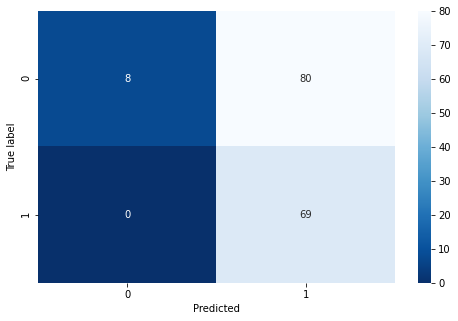

In [144]:
#построим матрицу ошибок
plt.subplots(figsize=(8, 5))
cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.ylabel('True label')
plt.xlabel('Predicted')

### С помощью получившейся модели прогнозируем вкус молока коров, которых фермер хочет купить (в датасете cow_buy.csv)

In [145]:
cow_buy_new.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,эке,сырой_протеин_г,спо,эке_в_квадрате
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,больше_0.9,233.361138
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,больше_0.9,233.361138


In [146]:
cow_buy_new.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы',
       'текущая_жирность_%', 'текущий_белок_%', 'возраст', 'эке',
       'сырой_протеин_г', 'спо', 'эке_в_квадрате'],
      dtype='object')

In [147]:
cow_buy_new.columns = ['порода', 'тип_пастбища', 'порода_папы', 'имя_папы',\
       'жирность_%', 'белок_%', 'возраст', 'эке',\
       'сырой_протеин_г', 'спо', 'эке_в_квадрате']

In [148]:
# выделим списоки количественных и качественных признаков 
cat_col_names = ['спо', 'порода', 'тип_пастбища','возраст']
num_col_names = ['сырой_протеин_г', 'жирность_%', 'белок_%', 'эке_в_квадрате']

	 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Эти списки мы создали на этапе обучения модели выше. Можно ячейку выше удалить, чтобы не дублировать код.
        
</div> 


In [149]:
# подготовка количественных признаков (масштабирование)
cow_buy_scaled = scaler.transform(cow_buy_new[num_col_names])

In [150]:
# подготовка качественных признаков (кодирование)
cow_buy_ohe = encoder.transform(cow_buy_new[cat_col_names])

encoder_col_names = encoder.get_feature_names()

In [151]:
# создаём датафреймы из закодированных и отмасштабированных данных
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

In [152]:
# объединяем все преобразованные данные 
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
cow_buy_final = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

In [153]:
cow_buy_final.head()

,x0_меньше_0.9,x1_Соверин,x2_Холмистое,x3_менее_2_лет,сырой_протеин_г,жирность_%,белок_%,эке_в_квадрате
0,0.0,0.0,1.0,0.0,0.517384,-0.158918,0.094429,0.542248
1,0.0,0.0,0.0,1.0,0.517384,-0.399401,2.028176,0.542248
2,0.0,1.0,0.0,0.0,0.517384,-0.098797,-0.679069,0.542248
3,0.0,1.0,1.0,0.0,0.517384,-1.241093,-5.706810,0.542248
4,0.0,1.0,0.0,0.0,0.517384,0.201807,-0.679069,0.542248


In [154]:
taste_pred = (clf.predict_proba(cow_buy_final)[:, 1] >= 0.21).astype(int)
taste_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

С установленным порогом в 0.21 модель определяет, что все коровы дают невкусное молоко. Увеличим порог до 0.3

In [155]:
taste_pred = (clf.predict_proba(cow_buy_final)[:, 1] >= 0.3).astype(int)
taste_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

Две коровы дают вкусное молоко, выведем их данные

In [156]:
cow_buy['вкус'] = taste_pred
cow_buy['вкус'] = cow_buy['вкус'].map({0: 'вкусно', 1: 'не вкусно'}).astype(str)

In [157]:
result = cow_buy.query('удой_кг > 6000 and вкус == "вкусно"')
result

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,эке,сырой_протеин_г,спо,удой_кг,вкус
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,6404.216752,вкусно
16,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,6343.891242,вкусно


**Вывод:** Есть только 2 коровы, которые можно купить. При этом помним, что модель линейной регрессии склонна завышать положительный результат (оверительный интервал = 358.36)

## Итоговые выводы

<div style="border:solid orange 2px; padding: 40px">
    
**Общий вывод исследования данных:** 
 **Во время предобработки данных** все столбцы были приведены в единый вид, неявные и явные дубликаты были обработаны и тип данных изменен на необходимый, пропусков обнаружено не было.
В таблице `cow_buy` 20 строк и 4 дубликата (7 строк, а это целых 35%). Видно, что у коров нет номера id, скорее всего это не дубликаты, а разные коровы с одинаковыми характеристиками. Было принято решение оставить данные.

**Во время исследовательского анализа ferma_main было выявлено:**
- найден 1 выброс и удален в столбце Удой, других критичных выбросов не было обнаружено
- большая часть коров старше 2 лет,у многих коров молоко не вкусное (у 250 из примерно 600)

**Корреляционный анализ показал:**
Наибольшую корреляцию между целевым признаком удой имеют эке и спо (0.77 и 0.81 соответственно) и возрастом (с возрастом удой возрастает). Все остальные количественные признаки (кроме белка) так же имеют положительную корреляцию с целевым признаком. 
Так же между собой коррелируют признаки:
- спо и эке (0.75)
- жирность и эке (0.64)
- жирность и спо (0.63)
- сырой протеин и спо (0.45)

и другие признаки.

Нелинейная связь наблюдается между целевым признаком и входными признаками: эке, спо, жирность, белок

Линейная связь наблюдается между целевым признаком и входными признаками: сырой протеин

Умеренная корреляция наблюдается между целевым признаком и взодными признаками: сырой протеин, порода папы

Слабая корреляция наблюдается между целевым признаком и входными признаками: жирность, белок, порода, тип пастбища.

Можно сделать вывод, что состав молока не оказывает прямого влияния на удой.

Мультиколлинеарность между входными признаками не наблюдается. 

**Первая модель линейной регрессии:**

При обучении модели линейной регрессии в качестве целевого признака использовали `удой_кг`.
В качестве входных признаков использовали:
- `эке` - имет корреляцию с целевым признаком + ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы
- `сырой_протеин_г` - имет корреляцию с целевым признаком + содержание сырого протеина в корме (в граммах)
- `спо` - Сахаро-протеиновое соотношение — отношение сахара к протеину в корме коровы
- `порода`
- `тип_пастбища`
- `порода_папы`
- `возраст`

Среднеквадратичная ошибка (MSE) 1-й модели =43887.02
Корень среднеквадратичной ошибки  (MSE) 1-й модели =209.49
Средняя абсолютная ошибка (MAE) 1-й модели =164.24 

В 78 процентах случаев предсказание модели ближе к истине, чем среднее значение целевого признака.
Остатки имеют нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения.
Дисперсия показывает, что модель чаще или сильнее ошибается, предсказывая удой сильно выше или сильно ниже среднего. Это говорит о неточности модели. Данную ситуацию можно исправить либо, добавив больше признаков, либо, изменив взаимосвязь входных признаков с целевым.

**Вторая модель линейной регрессии:**

Так как СПО и Удой связаны нелинейно. На диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Видно, что при СПО > 0.91 коровы имеют удой от 6000 кг. А при СПО <= 0.91 удой меньше 6000 кг. Чтобы устранить нелинейность, преобразовали СПО в категориальный бинарный признак (разделили данные на 2 группы: 'меньше_0.9' и 'больше_0.9'), использовав эту границу.

Между ЭКЕ и Удоем так же наблюдается нелинейная связь. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате. Добавили новый признак эке_в_квадрате в таблице.

В качестве целевого признака использовали удой_кг. В качестве входных признаков использовали:

- `эке_в_квадрате`
- `сырой_протеин_г`
- `спо` 
- `порода`
- `тип_пастбища`
- `порода_папы`
- `возраст`

Среднеквадратичная ошибка (MSE) 2-ой модели =37095.72
Корень среднеквадратичной ошибки  (MSE) 2-ой модели =192.60
Средняя абсолютная ошибка (MAE) 2-ой модели =149.15

Данная модель справилась с прогнозом лучше первой, она не ошибается в 81,7 % случаях. 
Остатки имеют нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения. При этом данное смещение меньше, чем у предыдущей модели.
При анализе дисперсии ошибок при различных прогнозах можно заметить, что она стала более стабильной по сравнению с предыдущей моделью.
Опираясь на приведенный результат, можно сказать, что вторая модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым повлияло на модель в лучшую сторону.

**Третья модель линейной регрессии:**

Добавили новый признак имя_папы в датафрейм.

 В качестве целевого признака использовали удой_кг. В качестве входных признаков использовали:

- `эке_в_квадрате`
- `сырой_протеин_г`
- `спо` 
- `порода`
- `тип_пастбища`
- `порода_папы`
- `возраст`
- `имя_папы`

Среднеквадратичная ошибка (MSE) 3-й модели =35721.65
Корень среднеквадратичной ошибки  (MSE) 3-й модели =189.00
Средняя абсолютная ошибка (MAE) 3-й модели =146.27

Третья модель правильно предсказывает в 82.45% случаях. Что лучше, чем у первой и второй моделей. 
Остатки имеют нормальное распределение. 
При анализе дисперсии ошибок при различных прогнозах можно заметить, что она более стабильна по сравнению с первой моделью и второй.
Можно сказать, что третья модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым, а также добавление в расчет ещэ одного входного признака повлияло на модель в лучшую сторону.

В датафрейм, по которому необходимо предсказать удой, добавили недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение). Возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%, так как технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.


**Вывод по трем моделям линейной регрессии:** Третья модель имеет наименьшие показатели ошибок из всех трех вариантов. Использовав ее для прогноза получили результат удоя у всех коров от 6125.95 до 6617.76, что в пределах доверительного интервала прогноза лучшей модели =(5350.69649720375, 6750.13496805841).

**Модель логистической регрессии**

В качестве целевого признака использовали вкус. В качестве входных признаков использовали:

- эке_в_квадрате -ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы
- сырой_протеин_г - и содержание сырого протеина в корме (в граммах)
- спо - Сахаро-протеиновое соотношение — отношение сахара к протеину в корме коровы
- порода
- тип_пастбища
- порода_папы
- возраст
- жирность_%
- белок_%

Первоначальная модель имеет следующие характеристики:
- accuracy: 0.6369426751592356
- recall:  0.348
- precision:  0.667м
То есть модель ошибается в почти 36 % случаев.

Из матрицы ошибок видно, что:

- в 76 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (0 равно 0)
- в 45 случаях модель неправильно относла невкусное молоко к категории 'вкусно' (0 не равно 1)
- в 12 случаях модель неправильно относла вкусное молоко к категории ' не вкусно' (1 не равно 0)
- в 24 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно' (1 равно 1)

Но известно, что главное для заказчика - вкусное молоко. То есть можно сказать, что для него важно, чтобы среди купленных им коров не оказалось ни одной, которая дает невкусное молоко. Нам необходимо свести ошибку False Negative к минимуму. Потому что именно ошибка второго рода в данной случае должна быть уменьшена. Иначе может случится такое, что модель предскажет вкусное молоко - 0, когда оно невкусное - 1. Для этого необходимо изменить порог классификации.

Порогом классификации первоначально был выбран - 2.1, так как при данном значении модель не допускает ошибок второго рода, но при прогнозе не модель не выдала ни одной коровы для покупки, поэтому порог был увеличен до 3, при котором модель не совершает ошибок второго рода в 89.85% случаях.
    
    
**Рекомендация:**

Для улучшения качества модели, а в следствии и более точного прогнозирования модели классификации необходимо добавить дополнительные входящие признаки. 

Модели рекомендуют купить 2 коровы:
    
|порода    | тип_пастбища | порода_папы | имя_папы | жирность_%| белок_%| возраст    | эке       | сырой_протеин_г| спо      | удой_кг     | вкус   |
|:---------|:------------:|------------:|---------:|----------:|-------:|-----------:|----------:|---------------:|---------:|-----------:|-------:|
| Соверин  | Холмистое    |  Айдиал     | Буйный   | 3.40      | 3.40   | менее_2_лет| 15.276162 | 2019.947532    | 0.958744 | 6404.216752 | вкусно |
| Айдиал   | Холмистое    |  Соверин    | Соловчик |3.73       | 3.73   | более_2_лет| 15.276162 | 2019.947532    | 0.958744 | 6343.891242 | вкусно |
    
 </div>